# Using Logisitic Regression to model Loan Defaults 

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
import seaborn as sns; sns.set_theme(color_codes=True)

### Creating a column to find if default occured

In [148]:
df = pd.read_csv("LendingClub_LoanStats3a_v12.csv")
df = df[(df["loan_status"]=="Fully Paid") | (df["loan_status"]=="Charged Off")]
df["Default"] = 1
df.loc[df["loan_status"]=="Fully Paid", "Default"] = 0
df

C:\Users\food4thought\AppData\Local\Temp\ipykernel_12672\173430594.py:1: DtypeWarning: Columns (21,24,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("LendingClub_LoanStats3a_v12.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,Default
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.870000,B,B2,...,0,0.0,5863.1553,5833.83980,5000.00000,863.15997,0.000000,0.0,0.00,0
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.830002,C,C4,...,0,0.0,1014.5300,1014.53000,456.45999,435.17001,0.000000,122.9,1.11,1
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.330002,C,C5,...,0,0.0,3005.6667,3005.66990,2400.00000,605.66998,0.000000,0.0,0.00,0
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.310000,C,C1,...,0,0.0,12231.8900,12231.89000,10000.00000,2214.91990,16.969999,0.0,0.00,0
5,1075269,1311441,5000,5000,5000.0,36 months,0.0790,156.460010,A,A4,...,0,0.0,5632.2100,5632.21000,5000.00000,632.21002,0.000000,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,92187,92174,2500,2500,1075.0,36 months,0.0807,78.419998,A,A4,...,0,0.0,2822.9692,1213.88000,2500.00000,322.97000,0.000000,0.0,0.00,0
39782,90665,90607,8500,8500,875.0,36 months,0.1028,275.380000,C,C1,...,0,0.0,9913.4922,1020.51000,8500.00000,1413.49000,0.000000,0.0,0.00,0
39783,90395,90390,5000,5000,1325.0,36 months,0.0807,156.840000,A,A4,...,0,0.0,5272.1611,1397.12000,5000.00000,272.16000,0.000000,0.0,0.00,0
39784,90376,89243,5000,5000,650.0,36 months,0.0743,155.380000,A,A2,...,0,0.0,5174.1987,672.65997,5000.00000,174.20000,0.000000,0.0,0.00,0


### Default Rate

In [149]:
default_rate = len(df.loc[(df["Default"]==1)])/len(df)
default_rate

0.14353496397036436

### Running a logistic regression of credit ratings on default

In [150]:
credit_ratings = pd.get_dummies(df['grade'])
model= sm.Logit(np.array(df["Default"]), sm.add_constant(np.array(credit_ratings)))
results = model.fit()
results.summary()

         Current function value: 0.392196
         Iterations: 35


D:\Applications\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                39412
Model:                          Logit   Df Residuals:                    39404
Method:                           MLE   Df Model:                            7
Date:                Sun, 23 Apr 2023   Pseudo R-squ.:                 0.04651
Time:                        21:02:31   Log-Likelihood:                -15457.
converged:                      False   LL-Null:                       -16211.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2777   5.46e+05  -2.34e-06      1.000   -1.07e+06    1.07e+06
x1            -1.4777   5.46e+05   -2.7e-06      1.000   -1.07e+06    1.07e+06
x2            -0.7163   5.46e+05  -1.31e-06      1.000   -1.07e+06    1.07e+06
x3            -0.3181   5.46e+05  -5.82e-07      1.000   -1.07e+06    1.07e+06
x4            -0.0177   5.46e+05  -3.25e-08      1.000   -1.07e+06    1.07e+06
x5             0.2206   5.46e+05   4.04e-07      1.000   -1.07e+06    1.07e+06
x6             0.4954   5.46e+05   9.07e-07      1.000   -1.07e+06    1.07e+06
x7             0.5362   5.46e+05   9.81e-07      1.000   -1.07e+06    1.07e+06
==============================================================================
"""

<AxesSubplot:xlabel='grade', ylabel='forecast'>

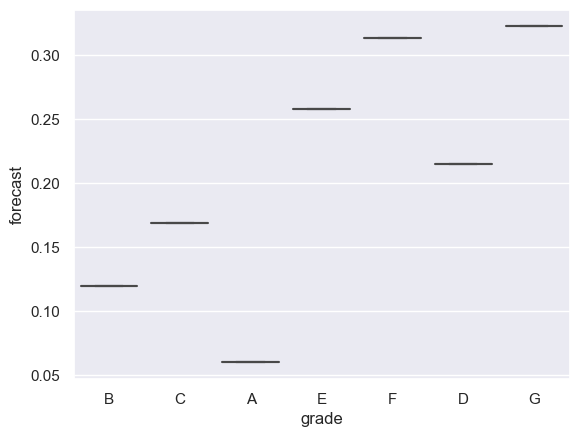

In [151]:
df["forecast"] = results.predict(sm.add_constant(np.array(credit_ratings)))
sns.boxplot(x=df["grade"], y=df["forecast"])

The credit rating A is the best with the least default rate whilst credit rating G is worst with highest default rate. Although the model fits the data fine, the coefficients do not make any sense because the logit regression fails to converge.

### Contrasting with Intercept-Only model
To test whether the logistic regression model performs better than the null model where only the intercept (beta0) is present, we can use a likelihood ratio test. The H0 for this test is that the logistic regression model is not significantly better than the null model, i.e., the additional predictors in the logistic model do not significantly improve the model fit compared to the intercept-only model.

To perform the likelihood ratio test, we need to first fit both the logistic regression model and the null model to the data. We can then calculate the likelihood ratio statistic, which is defined as the difference between the log-likelihoods of the two models multiplied by -2. The likelihood ratio statistic follows a chi-squared distribution with degrees of freedom equal to the difference in the number of parameters between the two models.

In [152]:
y = np.array(df["Default"])
X = sm.add_constant(np.array(credit_ratings))
null_model = sm.Logit(y, sm.add_constant(np.ones_like(y))).fit()
logit_model = sm.Logit(y, X).fit()
LR_stat = -2 * (null_model.llf - logit_model.llf)
LR_stat

Optimization terminated successfully.
         Current function value: 0.411329
         Iterations 6
         Current function value: 0.392196
         Iterations: 35


D:\Applications\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1508.097255675213

Since the LR stat is pretty high compared to its chisquared counter part, it means that we are logit model is significantly better than a null intercept model

### Lift Table and ROC curve

In [153]:
lift_table = pd.DataFrame()
lift_table["Credit Rating"] = credit_ratings.columns
lift_table["Lift"] = 0
total_prop = default_rate
groupby_obj = df.groupby('grade')
for name, group in groupby_obj:
    prop = len(group[group["Default"] == 1])/len(group)
    lift_table.loc[lift_table["Credit Rating"] == name, "Lift"] = prop/total_prop
lift_table

,Credit Rating,Lift
0,A,0.416495
1,B,0.834889
2,C,1.174467
3,D,1.497468
4,E,1.796554
5,F,2.186507
6,G,2.248119


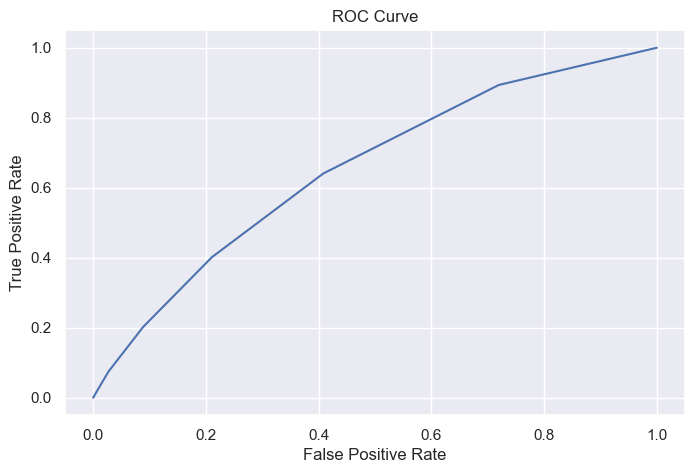

In [154]:
fpr, tpr, thresholds = roc_curve(df["Default"], df["forecast"])
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The resulting plot shows the ROC curve, which is a curve that starts at the point (0,0) and ends at the point (1,1), with the area under the curve (AUC) representing the performance of the classifier. A random classifier would have an AUC of 0.5, while a perfect classifier would have an AUC of 1.

#### We need to skew the FPR factor by 10x because of the amplified loss structure

In [155]:
def calc_profit(threshold, df):
        fn = df[(df["Default"] == 1) & (df["forecast"] < threshold)]
        fp = df[(df["Default"] == 0) & (df["forecast"] > threshold)]
        tn = df[(df["Default"] == 0) & (df["forecast"] < threshold)]
        tp = df[(df["Default"] == 1) & (df["forecast"] > threshold)]
        
        # False negatives are dangerous
        profit = (len(tn) * 1) - (len(fn) * 10)
        return profit
        
disc_thr = thresholds[0]
pair = [tpr[0], fpr[0]]
profit = calc_profit(disc_thr, df)
for i in range(len(thresholds)):
    p = calc_profit(thresholds[i], df)
    if p > profit:
        pair = [tpr[i], fpr[i]]
        profit = p
        disc_thr = thresholds[i]
disc_thr

0.11983574960194417

The cutoff default probability to maximize profits is 0.1198

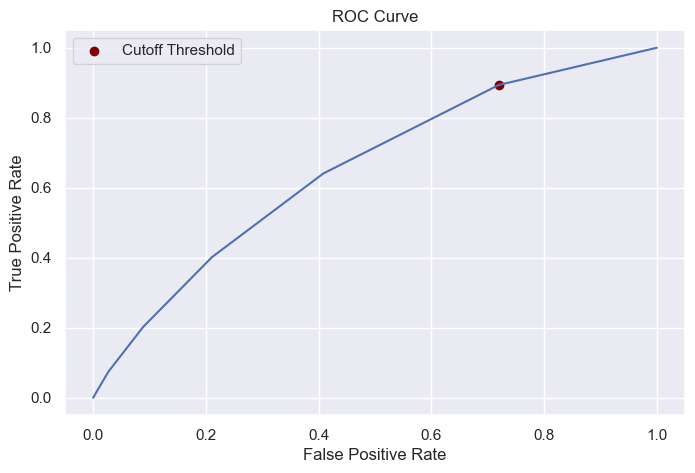

In [156]:
fpr, tpr, thresholds = roc_curve(df["Default"], df["forecast"])
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr)
plt.scatter(x=pair[1], y=pair[0], color="maroon", label="Cutoff Threshold")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Running a logistic regression on defaults using loan amount and annual income

In [157]:
# First lets save the old data 
grade_forecasts = df["forecast"]

X = np.array(df[['loan_amnt', 'annual_inc']])
Y = np.array(df["Default"])                
model= sm.Logit(Y, sm.add_constant(X))
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.406307
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                39412
Model:                          Logit   Df Residuals:                    39409
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Apr 2023   Pseudo R-squ.:                 0.01221
Time:                        21:03:57   Log-Likelihood:                -16013.
converged:                       True   LL-Null:                       -16211.
Covariance Type:            nonrobust   LLR p-value:                 1.121e-86
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7254      0.032    -53.708      0.000      -1.788      -1.662
x1          3.484e-05   2.08e-06     16.742      0.000    3.08e-05    3.89e-05
x2         -7.089e-06   4.66e-07    -15.201      0.000      -8e-06   -6.17e-06
==============================================================================
"""

D:\Applications\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='forecast'>

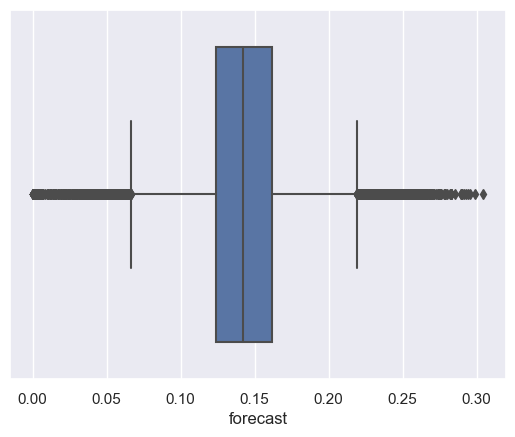

In [158]:
df["forecast"] = results.predict(sm.add_constant(X))
sns.boxplot(df["forecast"])

In [159]:
lift_table = pd.DataFrame()
total_prop = default_rate
deciles = []
lifts = []
df["Deciles"] = pd.qcut(df["forecast"], q=10)
groupby_obj = df.groupby("Deciles")
for name, group in groupby_obj:
    prop = len(group[group["Default"] == 1])/len(group)
    deciles.append(name)
    lifts.append(prop/total_prop)
lift_table["Deciles"] = deciles
lift_table["Lift"] = lifts
lift_table

,Deciles,Lift
0,"(-0.001, 0.104]",0.616341
1,"(0.104, 0.119]",0.728893
2,"(0.119, 0.128]",0.781554
3,"(0.128, 0.135]",0.880389
4,"(0.135, 0.142]",0.924565
5,"(0.142, 0.15]",0.993510
6,"(0.15, 0.157]",1.068983
7,"(0.157, 0.168]",1.043538
8,"(0.168, 0.186]",1.410713
9,"(0.186, 0.305]",1.551744


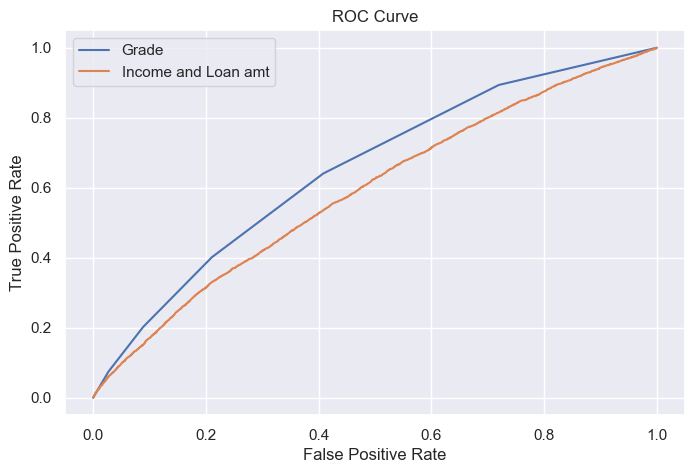

In [160]:
fpr1, tpr1, thresholds1 = roc_curve(df["Default"], grade_forecasts)
fpr2, tpr2, thresholds2 = roc_curve(df["Default"], df["forecast"])
plt.figure(figsize=(8,5))
plt.plot(fpr1, tpr1, label="Grade")
plt.plot(fpr2, tpr2, label="Income and Loan amt")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The grade forecasts perform better.

### Running a logistic regression on defaults using loan amount, annual income, maturity and interest rate

In [165]:
loan_forecasts = df["forecast"]

term = pd.get_dummies(df['term'])
X = pd.concat([df[['loan_amnt', 'annual_inc', 'int_rate']], term], axis=1)
X = np.array(X)
Y = np.array(df["Default"])                
model= sm.Logit(Y, sm.add_constant(X))
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.385901
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                39412
Model:                          Logit   Df Residuals:                    39407
Method:                           MLE   Df Model:                            4
Date:                Sun, 23 Apr 2023   Pseudo R-squ.:                 0.06182
Time:                        21:21:56   Log-Likelihood:                -15209.
converged:                       True   LL-Null:                       -16211.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0261   1.56e+06   -1.3e-06      1.000   -3.06e+06    3.06e+06
x1          1.176e-06   2.31e-06      0.509      0.611   -3.35e-06    5.71e-06
x2         -6.117e-06   4.64e-07    -13.173      0.000   -7.03e-06   -5.21e-06
x3            13.4873      0.456     29.575      0.000      12.593      14.381
x4            -1.2399   1.56e+06  -7.94e-07      1.000   -3.06e+06    3.06e+06
x5            -0.7862   1.56e+06  -5.04e-07      1.000   -3.06e+06    3.06e+06
==============================================================================
"""

In [167]:
df["forecast"] = results.predict(sm.add_constant(X))
lift_table = pd.DataFrame()
total_prop = default_rate
deciles = []
lifts = []
df["Deciles"] = pd.qcut(df["forecast"], q=10)
groupby_obj = df.groupby("Deciles")
for name, group in groupby_obj:
    prop = len(group[group["Default"] == 1])/len(group)
    deciles.append(name)
    lifts.append(prop/total_prop)
lift_table["Deciles"] = deciles
lift_table["Lift"] = lifts
lift_table

,Deciles,Lift
0,"(-0.0009999999999999755, 0.0611]",0.254500
1,"(0.0611, 0.0744]",0.443721
2,"(0.0744, 0.0903]",0.560396
3,"(0.0903, 0.107]",0.689446
4,"(0.107, 0.123]",0.811425
5,"(0.123, 0.143]",1.011188
6,"(0.143, 0.165]",1.099579
7,"(0.165, 0.198]",1.306412
8,"(0.198, 0.264]",1.642297
9,"(0.264, 0.568]",2.180926


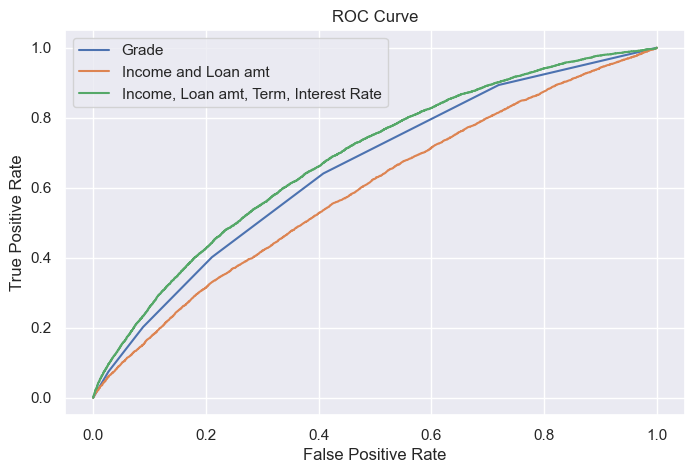

In [168]:
fpr1, tpr1, thresholds1 = roc_curve(df["Default"], grade_forecasts)
fpr2, tpr2, thresholds2 = roc_curve(df["Default"], loan_forecasts)
fpr3, tpr3, thresholds3 = roc_curve(df["Default"], df["forecast"])
plt.figure(figsize=(8,5))
plt.plot(fpr1, tpr1, label="Grade")
plt.plot(fpr2, tpr2, label="Income and Loan amt")
plt.plot(fpr3, tpr3, label="Income, Loan amt, Term, Interest Rate")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The new model performs better than both the other models. This is because term structure and interest rates could be valuable inputs in understanding whether individuals would default on their loans or not.

In [178]:
term = pd.get_dummies(df['term'])
df['int_sq'] = df['int_rate'] ** 2
X = pd.concat([df[['loan_amnt', 'annual_inc', 'int_rate', 'int_sq']], term], axis=1)
X = np.array(X)
Y = np.array(df["Default"])                
model= sm.Logit(Y, sm.add_constant(X))
results = model.fit(maxiter=1000)
results.summary()

Optimization terminated successfully.
         Current function value: 0.385576
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                39412
Model:                          Logit   Df Residuals:                    39406
Method:                           MLE   Df Model:                            5
Date:                Sun, 23 Apr 2023   Pseudo R-squ.:                 0.06261
Time:                        21:35:38   Log-Likelihood:                -15196.
converged:                       True   LL-Null:                       -16211.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5342        nan        nan        nan         nan         nan
x1          1.934e-06   2.31e-06      0.838      0.402   -2.59e-06    6.46e-06
x2         -5.982e-06   4.64e-07    -12.905      0.000   -6.89e-06   -5.07e-06
x3            25.5300      2.458     10.385      0.000      20.712      30.348
x4           -44.9436      8.985     -5.002      0.000     -62.554     -27.333
x5            -1.5011        nan        nan        nan         nan         nan
x6            -1.0331        nan        nan        nan         nan         nan
==============================================================================
"""

The coefficient of interest rate and its square both have p value ~ 0 (are significiant). The coefficient for int_rate is positive while it's square is negative which implies a proportionality between interest rates which is offseted by its squared component. This offsetting component could be useful if we have a reliable term structure model to compare the relative default losses of small changes in interest rates over time.